### 2- Exemplos de Usos de SVD e seus significados

Aplicação: Imagine que temos um conjunto de dados com muitas variáveis (ex: dados de sensores). Queremos reduzir o número de variáveis preservando a maior variabilidade possível.

U: Contém os vetores singulares à esquerda, que representam as direções de maior variabilidade dos dados nas linhas (ex: sensores).

Σ: Os valores singulares na diagonal indicam a "importância" de cada dimensão.

V T: Mostra as direções principais nas colunas (as variáveis), ou seja, os principais padrões dos sensores.


Aplicação: Em compressão de imagens, queremos manter apenas os componentes principais da imagem, reduzindo o tamanho da mesma sem perder muito da qualidade visual.

U: Representa as características estruturais da imagem.

Σ: Valores singulares maiores mantêm as informações principais da imagem.

VT: Representa a contribuição de cada coluna na reconstrução da imagem.

Aplicação: Resolver sistemas lineares mal-condicionados ou sobredeterminados, como ajustar uma reta em dados de sensores ruidosos.

U e VT: Definem as direções principais de variação, ou seja, como os dados variam em diferentes direções.

Σ: Representa os valores singulares que pesam cada direção; valores singulares muito pequenos são ignorados para evitar instabilidade.

Aplicação: Usar SVD para remover ruído de dados como séries temporais ou imagens. Exemplo: remoção de ruído de uma imagem.

U e VT: As estruturas principais da imagem são preservadas.

Σ: Os valores singulares pequenos correspondem ao ruído, e podem ser descartados para melhorar a qualidade da imagem.

Aplicação: Sistemas de recomendação como os usados pela Netflix ou Amazon. Vamos recomendar produtos/filmes com base no padrão de preferências dos usuários.

U: Define os padrões de preferências dos usuários.

Σ: Os valores singulares maiores destacam os padrões principais de preferências.

VT: Representa os padrões nas características dos filmes.

#### Resumo

U: Contém os vetores singulares à esquerda que capturam a variabilidade nas linhas (usuários, amostras, etc.).

Σ: Valores singulares descrevem a "importância" de cada componente.

VT: Captura a variabilidade nas colunas (filmes, variáveis, etc.).

### 3- Exemplo de Redução de Imagem com Código

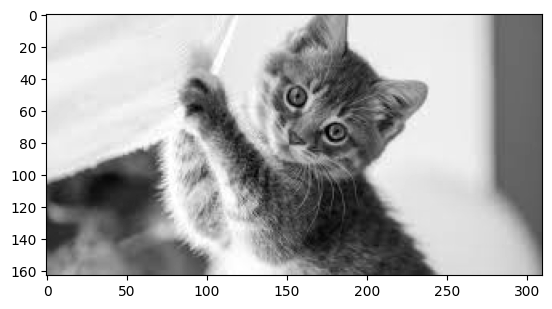

In [3]:
# Leia uma imagem png e converta para escala de cinza
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('../photos/3.3.1.png')
X = img.mean(axis=2)
plt.imshow(X, cmap='gray')

In [4]:
import numpy as np

U, S, Vt = np.linalg.svd(X)
detail_level = 40

U_aprox = U[:, :detail_level]
S_aprox = S[:detail_level]
Vt_aprox = Vt[:detail_level, :]

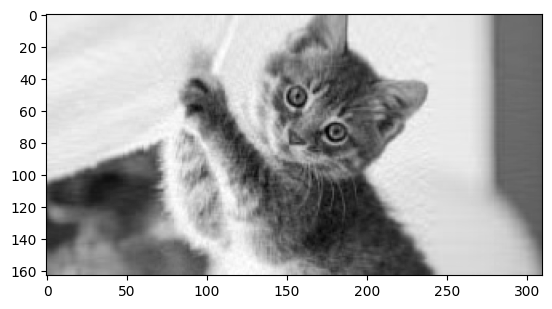

In [5]:
X_aprox = U_aprox @ np.diag(S_aprox) @ Vt_aprox
plt.imshow(X_aprox, cmap='gray')

### 4- Similaridade por Distância Cosseno

A similaridade por distâncias cosseno no contexto de SVD (Singular Value Decomposition) é usada para medir a similaridade entre vetores, frequentemente na redução de dimensionalidade de dados e em análises de sistemas de recomendação.

1. **SVD** decompõe uma matriz em três componentes onde:
- A é a matriz original.
- 𝑈 e VT são matrizes ortogonais que contêm informações sobre os padrões (dimensões latentes) dos dados.
- Σ contém os valores singulares (forças dessas relações).

2. **Vetores na nova dimensão:** Após a decomposição, os vetores de interesse (por exemplo, usuários e itens em sistemas de recomendação) são projetados em um espaço de menor dimensionalidade, preservando as características mais importantes dos dados.

3. **Cálculo da similaridade por cosseno:**

- A distância cosseno mede o ângulo entre dois vetores. Se o ângulo entre dois vetores for pequeno, a similaridade cosseno será alta (próxima de 1), indicando que os vetores apontam em direções similares, e, portanto, os itens são semelhantes.
- Quando aplicado aos vetores resultantes da decomposição SVD, a similaridade cosseno ajuda a quantificar o quanto dois itens (ou usuários) são semelhantes em termos de seus padrões latentes.

4. **Uso em sistemas de recomendação:**

- A similaridade por distâncias cosseno pode ser usada para recomendar itens que têm vetores latentes semelhantes, isto é, itens que têm padrões ou comportamentos similares em um espaço de menor dimensionalidade após a decomposição SVD.

In [1]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Exemplo de matriz (usuário x item, por exemplo)
A = np.array([[5, 3, 0, 1],
              [4, 0, 0, 1],
              [1, 1, 0, 5],
              [1, 0, 0, 4],
              [0, 1, 5, 4]])

# Realizando a decomposição SVD
U, Sigma, VT = np.linalg.svd(A, full_matrices=False)

# Mantendo apenas os k maiores valores singulares para redução de dimensionalidade
k = 2
U_k = U[:, :k]  # Vetores principais de U
Sigma_k = np.diag(Sigma[:k])  # Valores singulares principais
VT_k = VT[:k, :]  # Vetores principais de V

# Vetores reduzidos
A_reduced = np.dot(U_k, Sigma_k)

# Calculando a similaridade por cosseno entre as linhas da matriz reduzida
similarity_matrix = cosine_similarity(A_reduced)

print("Matriz de Similaridade por Cosseno:")
print(similarity_matrix)


Matriz de Similaridade por Cosseno:
[[1.         0.99990901 0.54607114 0.53895629 0.13072227]
 [0.99990901 1.         0.55732219 0.55026997 0.1440842 ]
 [0.54607114 0.55732219 1.         0.99996413 0.90193385]
 [0.53895629 0.55026997 0.99996413 1.         0.90555928]
 [0.13072227 0.1440842  0.90193385 0.90555928 1.        ]]


#### Análise da Matriz:
1. **Diagonal Principal:**
A diagonal principal sempre terá valor 1, pois a similaridade cosseno de um vetor com ele mesmo é sempre 1 (o ângulo entre dois vetores idênticos é 0°, e o cosseno de 0° é 1).
Isso confirma que a similaridade de qualquer linha consigo mesma é perfeita.
2. **Comparação de Pares de Vetores (Linhas):**
Os valores fora da diagonal principal indicam a similaridade entre diferentes vetores. Esses valores estão entre 0 e 1, onde:
- 1 significa máxima similaridade (vetores apontando na mesma direção).
- 0 significa que os vetores são ortogonais (nenhuma similaridade).
- Valores negativos indicam que os vetores apontam em direções opostas (não ocorre nesse caso, pois os dados não permitem isso).